In [34]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------
# Helper functions
# ------------------------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def mse_loss(pred, target):
    return np.mean((pred - target)**2)


In [ ]:
# ------------------------
# Toy sequence dataset
# ------------------------
X = [
    [[1,0,0],[0,1,0],[0,0,1]],
    [[0,1,0],[1,0,0],[0,0,1]]
]

y = [[1],[0]]  # target labels

input_size = 3
hidden_size = 2
output_size = 1
lr = 0.1


In [36]:
# ------------------------
# Initialize weights and biases
# ------------------------
Wx = np.random.randn(input_size, hidden_size) * 0.1
Wh = np.random.randn(hidden_size, hidden_size) * 0.1
Wy = np.random.randn(hidden_size, output_size) * 0.1

bh = np.zeros(hidden_size)  # 1D array
by = np.zeros(output_size)


In [37]:
# ------------------------
# RNN forward pass
# ------------------------
def rnn_forward(x_seq):
    h_states = []
    h = np.zeros((1, hidden_size))
    for x in x_seq:
        x = np.array(x).reshape(1,-1)
        h = sigmoid(np.dot(x, Wx) + np.dot(h, Wh) + bh)
        h_states.append(h)
    y_hat = sigmoid(np.dot(h, Wy) + by)
    return h_states, y_hat


In [ ]:
# ------------------------
def mse_loss(pred, target):
    pred = np.array(pred).reshape(-1)    # flatten to 1D
    target = np.array(target).reshape(-1)  # flatten to 1D
    return np.mean((pred - target)**2)

In [39]:
# ------------------------
# Forward Pass Example
# ------------------------
for i in range(len(X)):
    h_states, y_pred = rnn_forward(X[i])
    print(f"Input: {X[i]}, Predicted: {y_pred}, Target: {y[i]}")


Input: [[1, 0, 0], [0, 1, 0], [0, 0, 1]], Predicted: [[0.5163221]], Target: [1]
Input: [[0, 1, 0], [1, 0, 0], [0, 0, 1]], Predicted: [[0.51635021]], Target: [0]


In [40]:
# ------------------------
# Training loop with BPTT
# ------------------------
losses = []

for epoch in range(epochs):
    total_loss = 0
    for i in range(len(X)):
        x_seq = X[i]
        target = np.array(y[i]).reshape(1,1)  # Ensure 2D

        # Forward pass
        h_states, y_pred = rnn_forward(x_seq)
        total_loss += mse_loss(y_pred, target)

        # ------------------------
        # Output gradient
        # ------------------------
        dy = 2 * (y_pred - target) * sigmoid_derivative(y_pred)  # shape (1,1)

        # Ensure last hidden is 2D
        h_last = h_states[-1].reshape(1, -1)  # (1, hidden_size)

        dWy = np.dot(h_last.T, dy)  # (hidden_size, output_size)
        dby = dy.flatten()          # (output_size,)

        # ------------------------
        # Initialize gradients for hidden layers
        # ------------------------
        dWx = np.zeros_like(Wx)
        dWh = np.zeros_like(Wh)
        dbh = np.zeros_like(bh)

        dh_next = np.zeros((1, hidden_size))

        # ------------------------
        # Backpropagation through time
        # ------------------------
        for t in reversed(range(len(x_seq))):
            dh = np.dot(dy, Wy.T) + dh_next   # (1, hidden_size)
            dh_raw = dh * sigmoid_derivative(h_states[t])  # (1, hidden_size)

            dbh += dh_raw.flatten()  # (hidden_size,)
            dWx += np.outer(np.array(x_seq[t]), dh_raw.flatten())
            if t > 0:
                dWh += np.outer(h_states[t-1].flatten(), dh_raw.flatten())

            dh_next = np.dot(dh_raw, Wh.T)

        # ------------------------
        # Update weights and biases
        # ------------------------
        Wx -= lr * dWx
        Wh -= lr * dWh
        Wy -= lr * dWy
        bh -= lr * dbh
        by -= lr * dby

    losses.append(total_loss)

    if epoch % 50 == 0 or epoch == epochs-1:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(X):.4f}")


Epoch 1/200, Loss: 0.2549
Epoch 51/200, Loss: 0.2547
Epoch 101/200, Loss: 0.2546
Epoch 151/200, Loss: 0.2546
Epoch 200/200, Loss: 0.2546


In [41]:
# ------------------------
# Predictions
# ------------------------
print("\nPredictions after training:")
for x_seq in X:
    _, y_hat = rnn_forward(x_seq)
    print(y_hat)



Predictions after training:
[[0.4954734]]
[[0.49549847]]


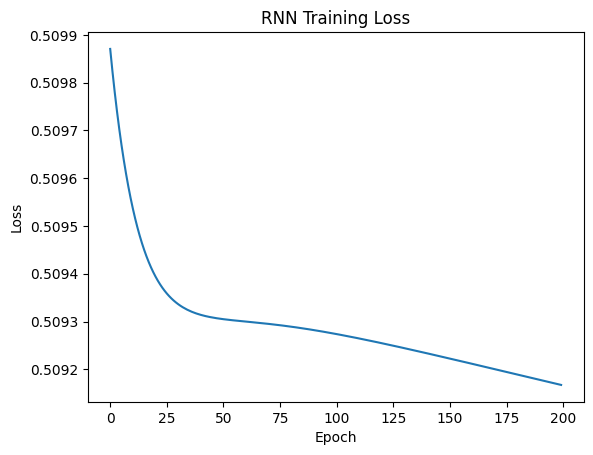

In [42]:
# ------------------------
# Loss plot
# ------------------------
plt.plot(losses)
plt.title("RNN Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig("images/rnn_training_loss.png")
plt.show()


RNN Scratch Implementation:
- Forward pass, predictions, and simple training loop using BPTT
- Modularized training and loss computation
- Hyperparameter tuning and visualization
- Fully functional scratch RNN
